### ref 

- https://archive.ics.uci.edu/ml/datasets/housing
- https://inclass.kaggle.com/c/boston-housing/data

In [1]:
# Load basics library 

import pandas as pd, numpy as np
%matplotlib inline
%pylab inline
import seaborn  as sns 
import pylab as pl
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
# load data 

df_train = pd.read_csv('/Users/yennanliu/Kaggle.com_mini_project/boston_house/train.csv')
df_test = pd.read_csv('/Users/yennanliu/Kaggle.com_mini_project/boston_house/test.csv')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [4]:
df_train.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [5]:
plt.style.use('ggplot')

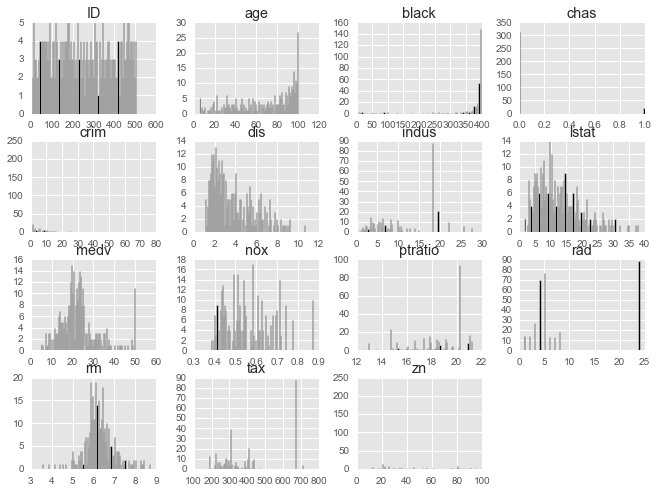

In [6]:
df_train.hist(bins=100, figsize=(11,8),color='black')
plt.show()

In [7]:
# CHECK features correlation

corr = df_train.corr()
corr.loc[:,'medv'].abs().sort_values(ascending=False)[1:]

lstat      0.738600
rm         0.689598
ptratio    0.481376
indus      0.473932
tax        0.448078
nox        0.413054
crim       0.407454
age        0.358888
rad        0.352251
zn         0.344842
black      0.336660
dis        0.249422
ID         0.221694
chas       0.204390
Name: medv, dtype: float64

In [8]:
selected_feature = ['lstat','rm','ptratio']

## 0) Help functions

In [42]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

# help function 
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


## 1) SELECT MODELS 

In [9]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error


In [10]:
# help function

def train_test_separate(X,y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)
    return X_train, X_test, y_train, y_test


### 1-1) Linear regression 

In [11]:
from sklearn import linear_model

# un-normalized data with linear regression 

linear_model = linear_model.LinearRegression()

X =df_train[selected_feature]
y = df_train['medv']
X_train, X_test, y_train, y_test = train_test_separate(X,y)


linear_model.fit(X_train,y_train)
linear_model.score(X_test,y_test)

//anaconda/envs/g_dash/lib/python3.4/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


0.48655692436754305

In [12]:
# normalized data with linear regression 

from sklearn import preprocessing

df_train_scaled = preprocessing.scale(df_train)
df_train_scaled_ = pd.DataFrame(df_train_scaled, columns = df_train.columns)


X_scaled =df_train[selected_feature]
y_scaled = df_train['medv']
X_train_, X_test_, y_train_, y_test_ = train_test_separate(X_scaled,y_scaled)

linear_model.fit(X_train_,y_train_)
linear_model.score(X_test_,y_test_)

0.48655692436754305

In [13]:
# cross validation 

from sklearn.model_selection import cross_val_score

scores = cross_val_score(linear_model, X_test_,y_test_, cv=5)
print ('scores :' , scores)

# mean score and its 95% confidence interval
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


scores : [ 0.28584385  0.72494055  0.4828689   0.63250294  0.41971914]
Accuracy: 0.51 (+/- 0.31)


In [33]:
# k fold cross validation 



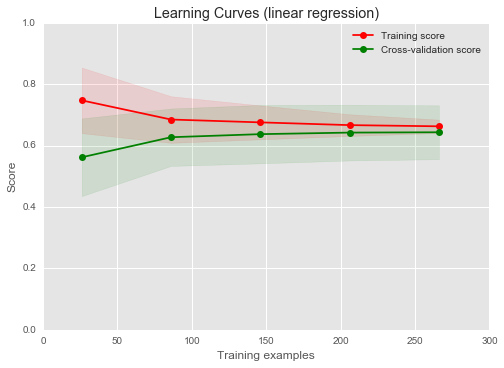

In [43]:
# Learning Curves
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = linear_model
title = "Learning Curves (linear regression)"
plot_learning_curve(estimator, title, X, y, ylim=(0.0, 1.0), cv=cv, n_jobs=4)

plt.grid()
plt.show()

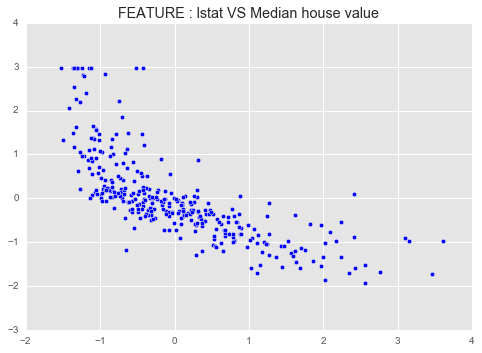

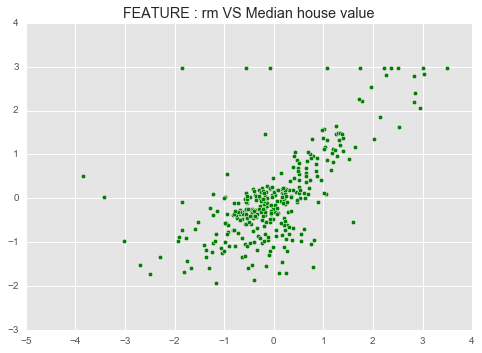

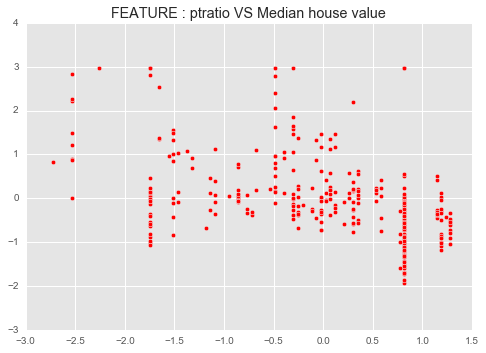

In [15]:
from itertools import cycle
cycol = cycle('bgrcmk')

for feature in selected_feature:
    plt.scatter(df_train_scaled_[feature],df_train_scaled_['medv'], c=next(cycol))
    plt.title('FEATURE : {} VS Median house value'.format(feature) )
    plt.show()
    

### 1-2) Polynomial regression

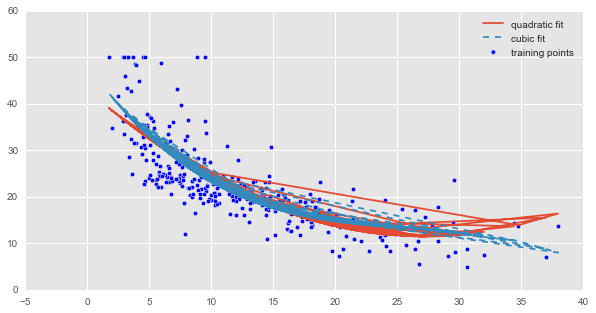

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)

X_ = df_train[['lstat']].values
y_ = df_train[['medv']].values

# transform feature
X_quad = quadratic.fit_transform(X_)
X_cubic = cubic.fit_transform(X_)

# quadratic fit 
pr = LinearRegression()
pr.fit(X_quad,y_)
y_quad_fit = pr.predict(quadratic.fit_transform(X_))

# cubic fit 
pr = LinearRegression()
pr.fit(X_cubic,y_)
y_cubic_fit = pr.predict(cubic.fit_transform(X_))

# visualize 


plt.figure(figsize=(10,5))


plt.scatter(X_,y_, label = 'training points')
plt.plot(X_,y_quad_fit, label = 'quadratic fit',linestyle = '-')
plt.plot(X_,y_cubic_fit, label = 'cubic fit',linestyle = '--')
plt.legend(loc='upper right')
plt.show()



### need to check if data points are ordering 

### 2-1) SVR 

In [17]:
from sklearn.svm import SVR

SVR_model = SVR(kernel='rbf', C=1e3, gamma=0.1)

X =df_train[selected_feature]
y = df_train['medv']
X_train, X_test, y_train, y_test = train_test_separate(X,y)


SVR_model.fit(X_train,y_train)
SVR_model.score(X_test,y_test)

0.528900711362843

In [18]:
# cross validation 

from sklearn.model_selection import cross_val_score

scores = cross_val_score(SVR_model, X_test,y_test, cv=5)
print ('scores :' , scores)

# mean score and its 95% confidence interval
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


scores : [ 0.33768416  0.73944382  0.42625285  0.44393447 -0.10596506]
Accuracy: 0.37 (+/- 0.55)


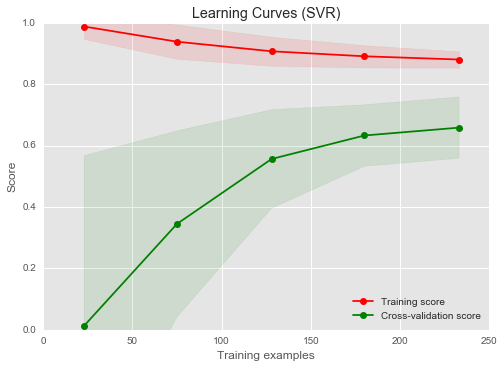

In [45]:
# Learning Curves


cv = ShuffleSplit(n_splits=100, test_size=0.3, random_state=0)

estimator = SVR_model
title = "Learning Curves (SVR)"
plot_learning_curve(estimator, title, X, y, ylim=(0.0, 1.0), cv=cv, n_jobs=4)

plt.grid()
plt.show()

In [19]:
## Search best parameter for SVR 

from sklearn import svm
from sklearn.model_selection import GridSearchCV
svc = svm.SVC(C=1, kernel='linear')

Cs = np.logspace(-6, -1, 10)
lf = GridSearchCV(estimator=svc, param_grid=dict(C=Cs),n_jobs=-1)

#clf.fit(X_train,y_train)

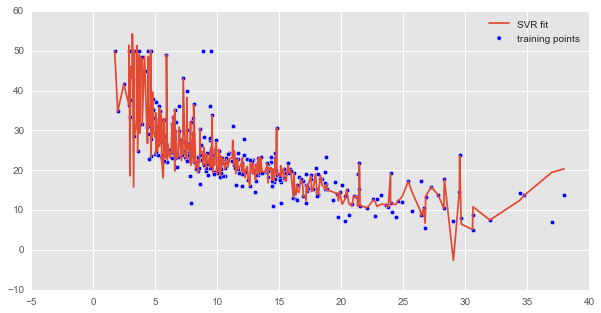

In [20]:
### make data ploints ordering 
sort_idx = X['lstat'].values.flatten().argsort()

plt.figure(figsize=(10,5))

plt.scatter(X['lstat'],y,label = 'training points')

y_SVR_predict =  SVR_model.predict(X)
plt.plot(X['lstat'][sort_idx],y_SVR_predict[sort_idx], label = 'SVR fit',linestyle = '-')

plt.legend(loc='upper right')
plt.show()


###  3-1) Random forest 

In [21]:
from sklearn.ensemble import RandomForestRegressor


RandomForest_model = RandomForestRegressor()

X = df_train[selected_feature]
y = df_train['medv']
X_train, X_test, y_train, y_test = train_test_separate(X,y)


RandomForest_model.fit(X_train,y_train)
RandomForest_model.score(X_test,y_test)

0.79125918004362805

In [22]:
# cross validation 

from sklearn.model_selection import cross_val_score

scores = cross_val_score(RandomForest_model, X_test,y_test, cv=10)
print ('scores :' , scores)

# mean score and its 95% confidence interval
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


scores : [ 0.59715597  0.60909228  0.77896146  0.81091269  0.59998438  0.69429506
  0.6852172   0.91394131  0.69978214  0.69850369]
Accuracy: 0.71 (+/- 0.19)


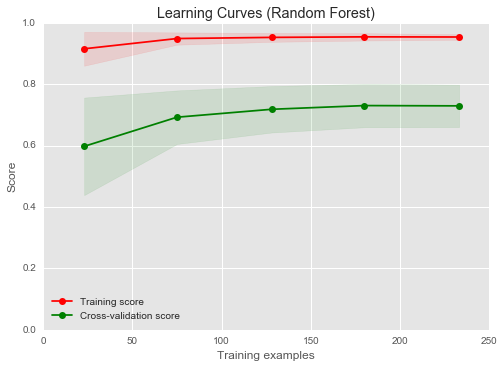

In [46]:
# Learning Curves


cv = ShuffleSplit(n_splits=100, test_size=0.3, random_state=0)

estimator = RandomForest_model
title = "Learning Curves (Random Forest)"
plot_learning_curve(estimator, title, X, y, ylim=(0.0, 1.0), cv=cv, n_jobs=4)

plt.grid()
plt.show()

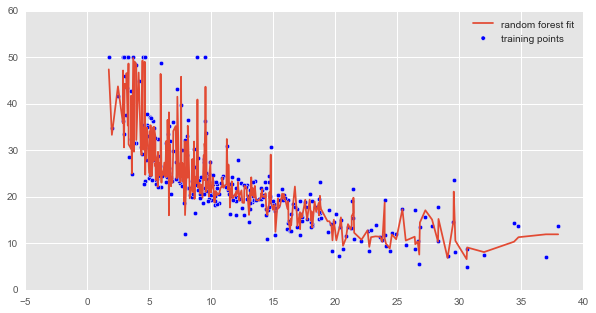

In [23]:
### make data ploints ordering 
sort_idx = X['lstat'].values.flatten().argsort()

plt.figure(figsize=(10,5))

plt.scatter(X['lstat'],y,label = 'training points')

y_tree_predict =  RandomForest_model.predict(X)
plt.plot(X['lstat'][sort_idx],y_tree_predict[sort_idx], label = 'random forest fit',linestyle = '-')

plt.legend(loc='upper right')
plt.show()


In [47]:
### make data ploints ordering 
#sort_idx = X_test['lstat'].values.flatten().argsort()

#plt.figure(figsize=(10,5))

#plt.scatter(X_test['lstat'][sort_idx],y_test[sort_idx],label = 'test points')

#y_test_tree_predict =  RandomForest_model.predict(X_test)
#plt.plot(X_test['lstat'][sort_idx],y_test_tree_predict[sort_idx], label = 'random forest fit',linestyle = '-')

#plt.legend(loc='upper right')
#plt.show()
